# HR Analytics Project- Understanding the Attrition in HR

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dipesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Pre Processing

In [3]:
#checking the shape of the dataset
df.shape

(1470, 35)

In [4]:
# Checking each column name present in the dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# checking the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# checking the data types of each columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [18]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [7]:
#Describing the dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Observations
*  There are no null values present in the dataset
*  The dataset contains 1470 rows and 35 columns
*  No duplicate are present in the dataset
*  Over18 has only one value, yes, so I can drop it
*  StandardHours also has one value is 80 , so I can drop it

##  EDA and Visualization

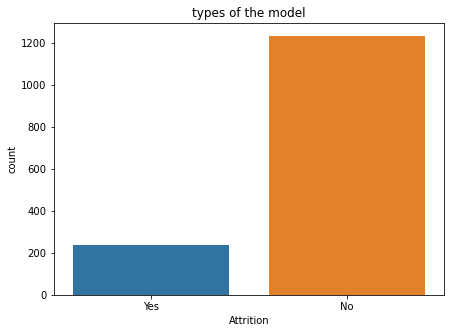

In [8]:

plt.figure(figsize=(7,5))
sns.countplot(x='Attrition' , data=df)
plt.title('types of the model')
plt.show()

## From the graph we can more than 80% stayed in the company only few were left.

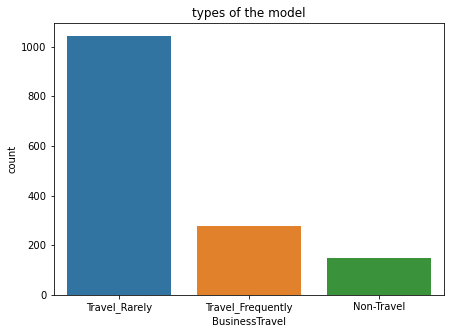

In [9]:

plt.figure(figsize=(7,5))
sns.countplot(x='BusinessTravel' , data=df)
plt.title('types of the model')
plt.show()

## from the graph most of the people travel rarely.

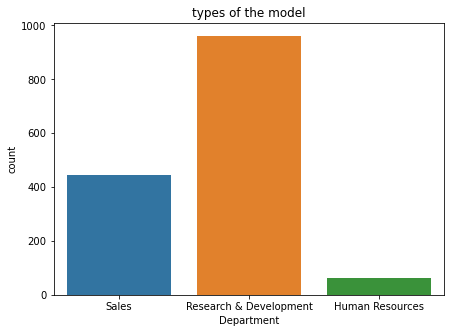

In [10]:

plt.figure(figsize=(7,5))
sns.countplot(x='Department' , data=df)
plt.title('types of the model')
plt.show()

## From the graph there are 3 departments and most people are from Research and development department.

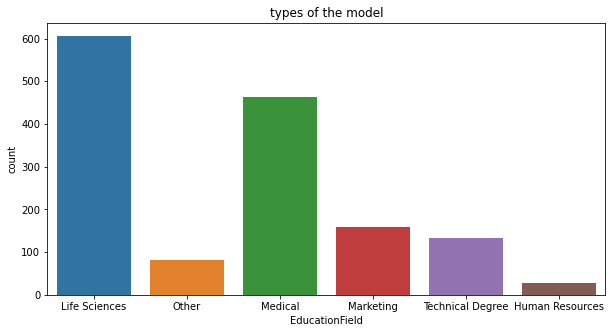

In [11]:

plt.figure(figsize=(10,5))
sns.countplot(x='EducationField' , data=df)
plt.title('types of the model')
plt.show()

## From the Graph the education of the most people is Life science followed by Medical followed by Marketing and last Techinical Degree.

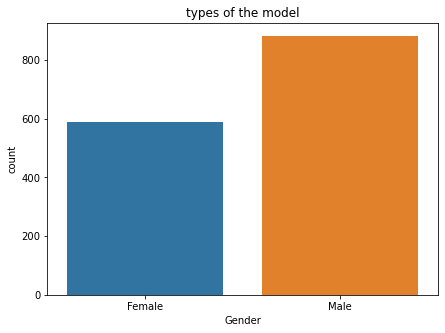

In [12]:

plt.figure(figsize=(7,5))
sns.countplot(x='Gender' , data=df)
plt.title('types of the model')
plt.show()

## From the graph we can say that the dataset conatin most male followed by female.

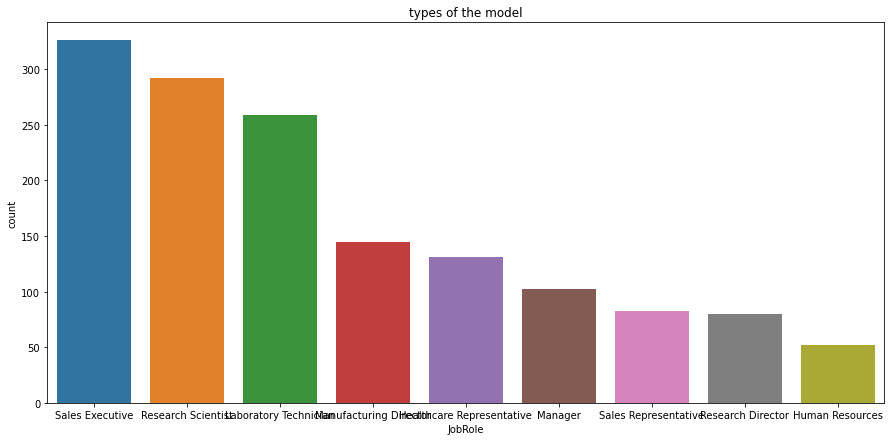

In [13]:

plt.figure(figsize=(15,7))
sns.countplot(x='JobRole' , data=df)
plt.title('types of the model')
plt.show()

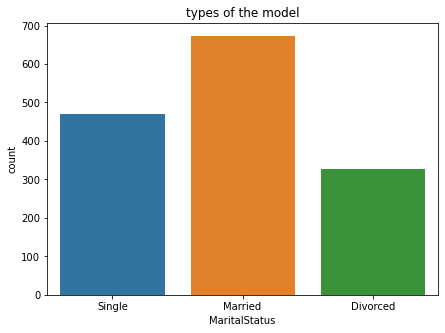

In [14]:

plt.figure(figsize=(7,5))
sns.countplot(x='MaritalStatus' , data=df)
plt.title('types of the model')
plt.show()

## From the graph we can say that mostly people are married status, followed by sigle and at last divorced.

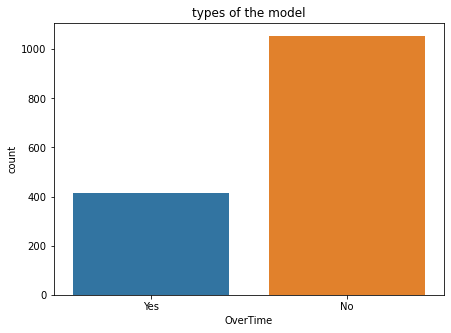

In [16]:

plt.figure(figsize=(7,5))
sns.countplot(x='OverTime' , data=df)
plt.title('types of the model')
plt.show()

## From the graph we can say that some people do overtime as well.

## Using Crosstab to understand the dataset

In [19]:
pd.crosstab(df.Attrition, df.JobRole).apply(lambda r: r/r.sum()*100,axis=1)

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,9.894566,3.244120,15.977291,7.866991,10.948905,6.326034,19.870235,21.816707,4.055150
Yes,3.797468,5.063291,26.160338,2.109705,4.219409,0.843882,19.831224,24.050633,13.924051


In [20]:
# Reassign target
df['Attrition'].replace(['No','Yes'],[0,1],inplace=True)
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [21]:
def graphs(x_feature,y_label,df):
    
    print(df[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(df[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = df)
    plt.figure(figsize = (15, 5))

In [22]:
pd.crosstab(df.Attrition, df.Gender)

Gender,Female,Male
Attrition,,
0,501,732
1,87,150


   Gender  Attrition
1    Male   0.170068
0  Female   0.147959


Male      882
Female    588
Name: Gender, dtype: int64




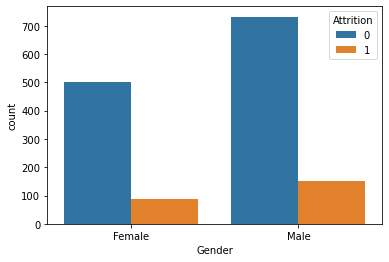

<Figure size 1080x360 with 0 Axes>

In [23]:
graphs('Gender','Attrition',df)

In [24]:
pd.crosstab(df.Attrition, df.BusinessTravel)

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,138,208,887
1,12,69,156


      BusinessTravel  Attrition
1  Travel_Frequently   0.249097
2      Travel_Rarely   0.149569
0         Non-Travel   0.080000


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64




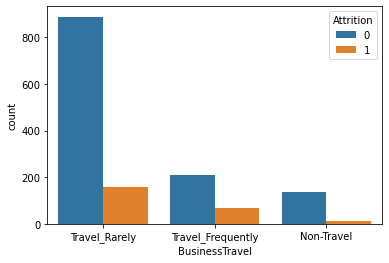

<Figure size 1080x360 with 0 Axes>

In [25]:
graphs('BusinessTravel','Attrition',df)

In [26]:
pd.crosstab(df.Attrition, df.Department)

Department,Human Resources,Research & Development,Sales
Attrition,,,
0,51,828,354
1,12,133,92


               Department  Attrition
2                   Sales   0.206278
0         Human Resources   0.190476
1  Research & Development   0.138398


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64




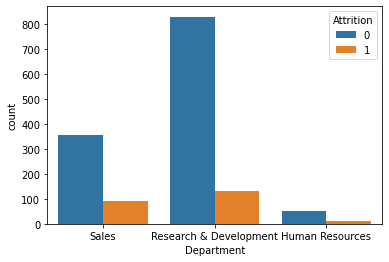

<Figure size 1080x360 with 0 Axes>

In [27]:
graphs('Department','Attrition',df)

In [28]:
pd.crosstab(df.Attrition, df.EnvironmentSatisfaction)

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
0,212,244,391,386
1,72,43,62,60


   EnvironmentSatisfaction  Attrition
0                        1   0.253521
1                        2   0.149826
2                        3   0.136865
3                        4   0.134529


3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64




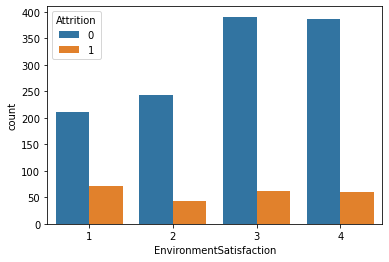

<Figure size 1080x360 with 0 Axes>

In [29]:
graphs('EnvironmentSatisfaction','Attrition',df)

In [30]:
pd.crosstab(df.Attrition, df.JobSatisfaction)

JobSatisfaction,1,2,3,4
Attrition,,,,
0,223,234,369,407
1,66,46,73,52


   JobSatisfaction  Attrition
0                1   0.228374
2                3   0.165158
1                2   0.164286
3                4   0.113290


4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64




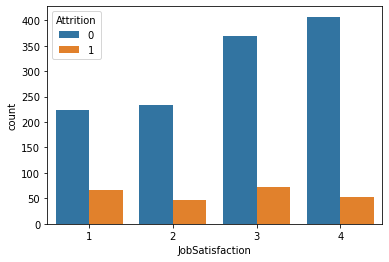

<Figure size 1080x360 with 0 Axes>

In [31]:
graphs('JobSatisfaction','Attrition',df)

In [33]:
pd.crosstab( df.NumCompaniesWorked,df.Attrition)

Attrition,0,1
NumCompaniesWorked,,
0,174,23
1,423,98
2,130,16
3,143,16
4,122,17
5,47,16
6,54,16
7,57,17
8,43,6


   NumCompaniesWorked  Attrition
5                   5   0.253968
9                   9   0.230769
7                   7   0.229730
6                   6   0.228571
1                   1   0.188100
8                   8   0.122449
4                   4   0.122302
0                   0   0.116751
2                   2   0.109589
3                   3   0.100629


1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64




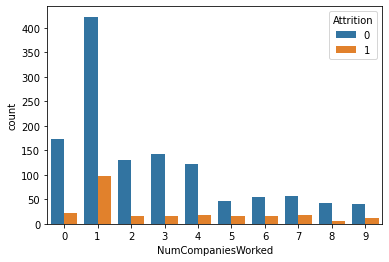

<Figure size 1080x360 with 0 Axes>

In [34]:
graphs('NumCompaniesWorked','Attrition',df)

In [35]:
pd.crosstab( df.OverTime,df.Attrition)

Attrition,0,1
OverTime,,
No,944,110
Yes,289,127


  OverTime  Attrition
1      Yes   0.305288
0       No   0.104364


No     1054
Yes     416
Name: OverTime, dtype: int64




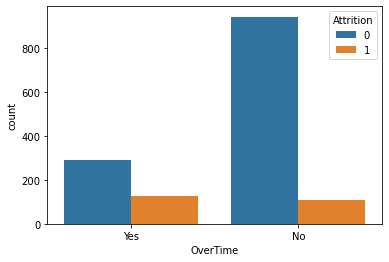

<Figure size 1080x360 with 0 Axes>

In [36]:
graphs('OverTime','Attrition',df)

In [37]:
pd.crosstab( df.PercentSalaryHike,df.Attrition)

Attrition,0,1
PercentSalaryHike,,
11,169,41
12,165,33
13,175,34
14,177,24
15,83,18
16,64,14
17,68,14
18,76,13
19,67,9


    PercentSalaryHike  Attrition
13                 24   0.285714
11                 22   0.214286
12                 23   0.214286
0                  11   0.195238
5                  16   0.179487
4                  15   0.178218
6                  17   0.170732
1                  12   0.166667
2                  13   0.162679
7                  18   0.146067
9                  20   0.127273
3                  14   0.119403
8                  19   0.118421
10                 21   0.104167
14                 25   0.055556


11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64




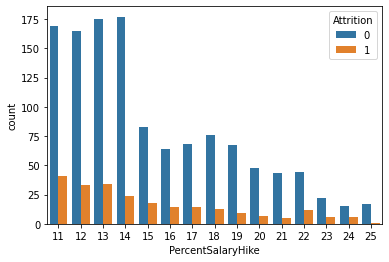

<Figure size 1080x360 with 0 Axes>

In [38]:
graphs('PercentSalaryHike','Attrition',df)

In [39]:
pd.crosstab( df.PerformanceRating,df.Attrition)

Attrition,0,1
PerformanceRating,,
3,1044,200
4,189,37


   PerformanceRating  Attrition
1                  4   0.163717
0                  3   0.160772


3    1244
4     226
Name: PerformanceRating, dtype: int64




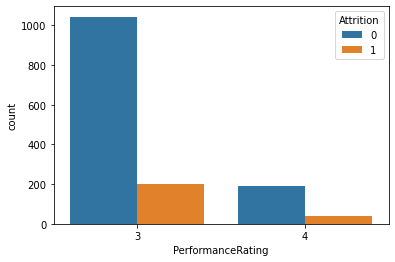

<Figure size 1080x360 with 0 Axes>

In [40]:
graphs('PerformanceRating','Attrition',df)

In [41]:
pd.crosstab( df.YearsSinceLastPromotion,df.Attrition)

Attrition,0,1
YearsSinceLastPromotion,,
0,471,110
1,308,49
2,132,27
3,43,9
4,56,5
5,43,2
6,26,6
7,60,16
8,18,0


    YearsSinceLastPromotion  Attrition
9                         9   0.235294
15                       15   0.230769
7                         7   0.210526
13                       13   0.200000
0                         0   0.189329
6                         6   0.187500
3                         3   0.173077
2                         2   0.169811
10                       10   0.166667
1                         1   0.137255
14                       14   0.111111
11                       11   0.083333
4                         4   0.081967
5                         5   0.044444
8                         8   0.000000
12                       12   0.000000


0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64




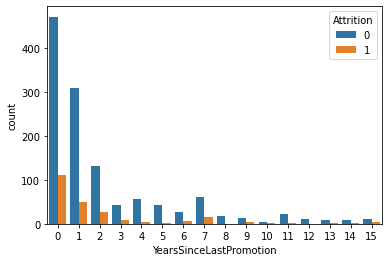

<Figure size 1080x360 with 0 Axes>

In [42]:
graphs('YearsSinceLastPromotion','Attrition',df)

In [43]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Observations from the crosstab and related graphs

* 17 % of people who leave the company is a man whereas 15% women , note dataset have men more than women

* The sales department has a higher percentage of Attrition = 0.206278 -Marital Status, Single has a higher percentage of Attrition = 0.255319

* people who work overtime have a higher percentage of Attrition = 0.305288 -An employee who had training between two and five times last year has a higher percentage of Attrition

* Life Sciences Education Field has a higher percentage of Attrition the average age for an employee who has a higher percentage of Attrition is between 26 and 32

## Applying Label Encoder to categorical columns

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le=LabelEncoder()
df1=le.fit_transform(df['BusinessTravel'])
pd.Series(df1)

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Length: 1470, dtype: int32

In [46]:
df['BusinessTravel']=df1

In [47]:
df2=le.fit_transform(df['Department'])
pd.Series(df1)
df['Department']=df2

In [48]:
df3=le.fit_transform(df['EducationField'])
pd.Series(df1)
df['EducationField']=df3

In [49]:
df4=le.fit_transform(df['Gender'])
pd.Series(df1)
df['Gender']=df4

In [50]:
df5=le.fit_transform(df['JobRole'])
pd.Series(df1)
df['JobRole']=df5

In [51]:
df6=le.fit_transform(df['MaritalStatus'])
pd.Series(df1)
df['MaritalStatus']=df6

In [52]:
df7=le.fit_transform(df['Over18'])
pd.Series(df1)
df['Over18']=df7

In [53]:
df8=le.fit_transform(df['OverTime'])
pd.Series(df1)
df['OverTime']=df8

In [54]:
#checking the datatypes again after appling the Label encoder
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [55]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Dropping Unwanted Columns

In [56]:
# Removing unncessary c columns
df.drop(['Over18' , 'EmployeeCount','StandardHours','EmployeeNumber'],axis=1,inplace = True)

###  Plotting Histogram plot to see how data is distributed on an interval scale.

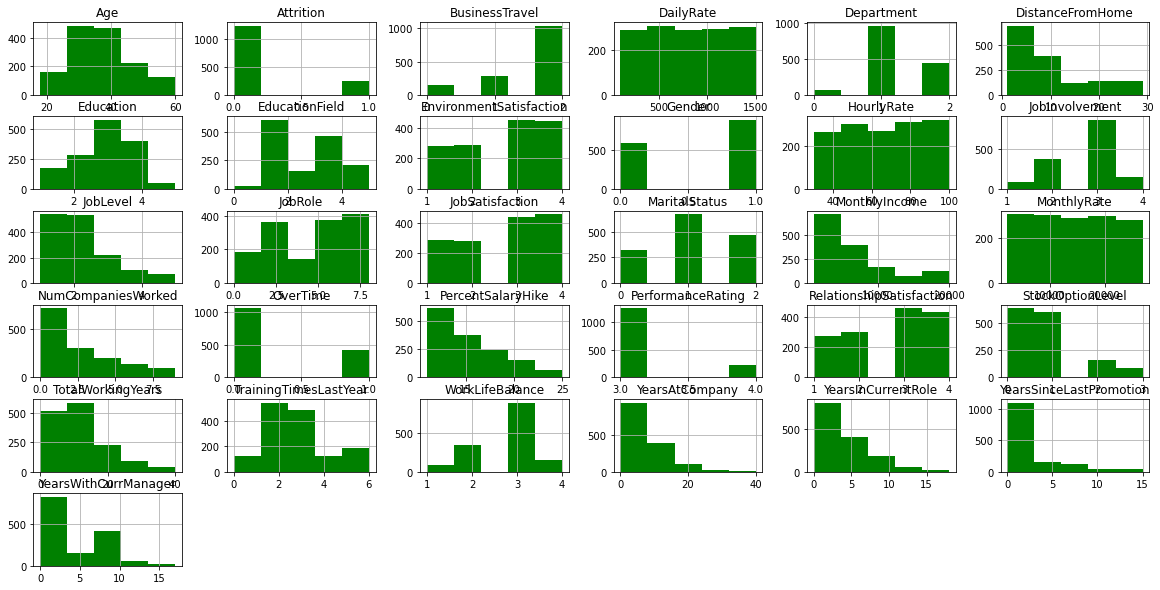

In [58]:
# analyzing the data
df.hist(color='g',figsize=(20,10),bins=5)
plt.show()

## From the histogram plot, we cannot see things very clearly but we can observe some left skewed data in continuous features, to get better visibility we can plot a distribution plot.

###  Plotting Disrtibution plot to see how data is distributed

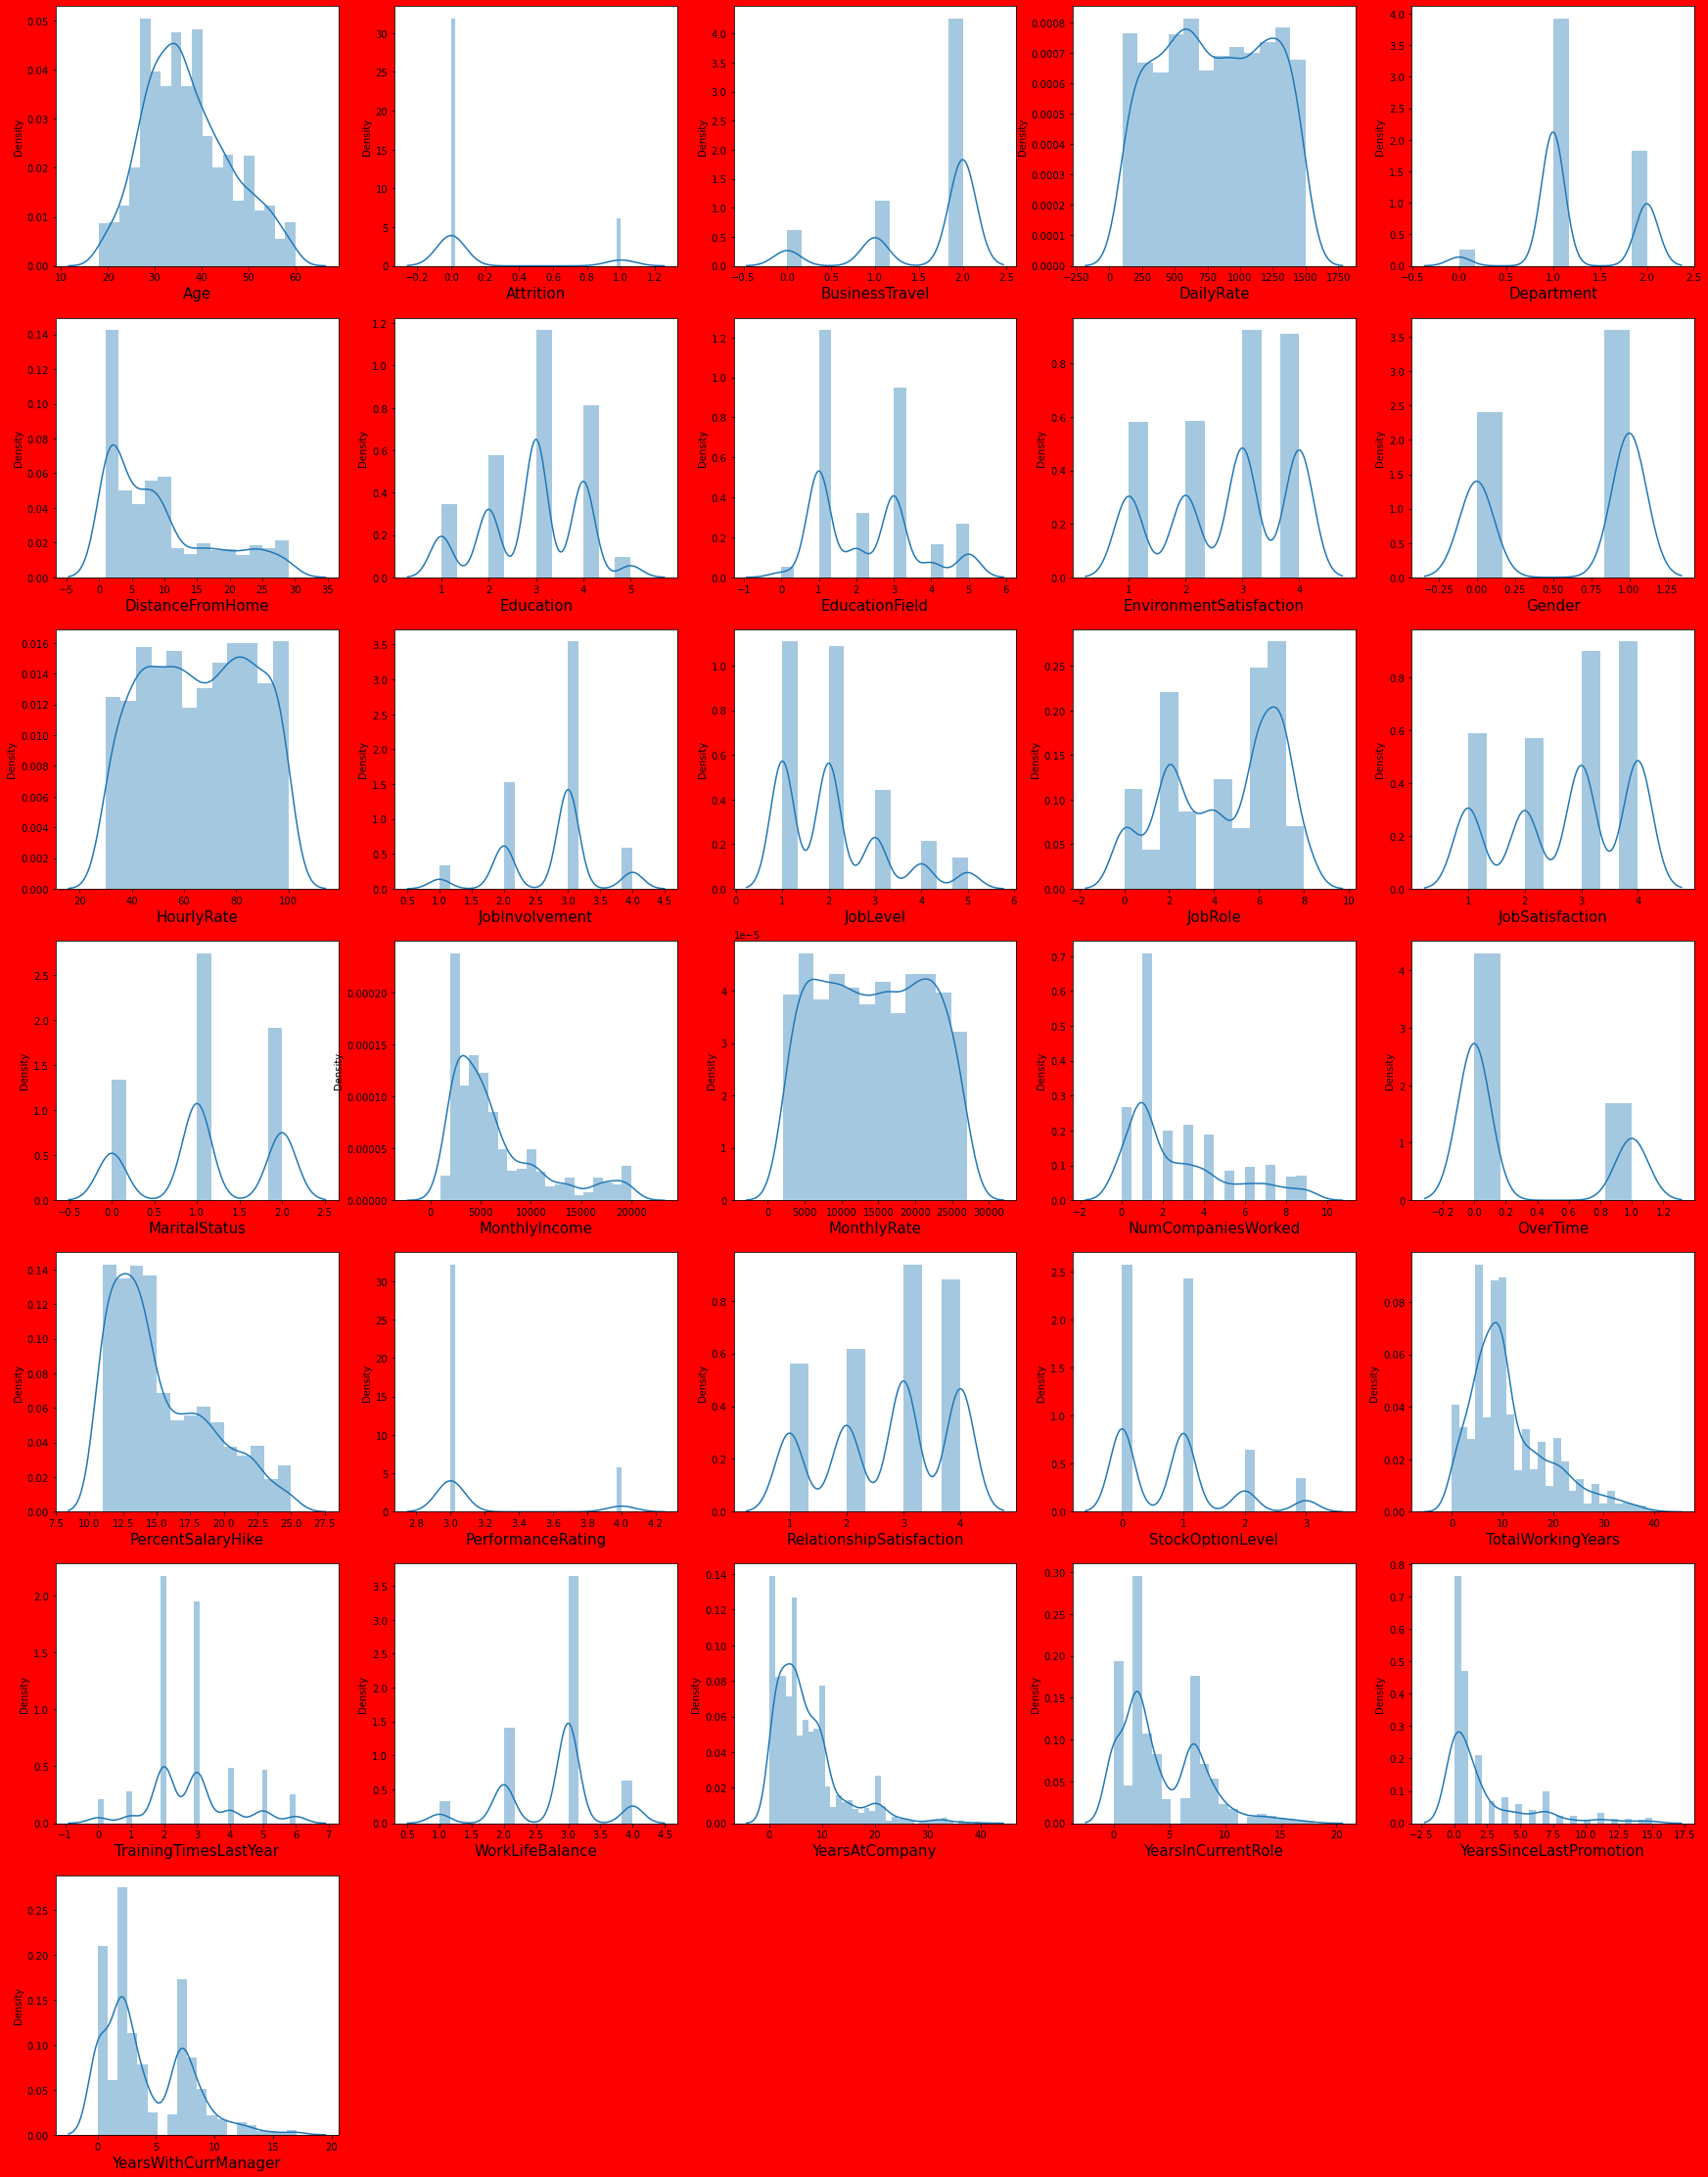

In [59]:
# seeeing dist plot how data is scttered
plt.figure(figsize=(30,40) , facecolor = 'red')
plotnumber = 1

for column in df:
    if plotnumber <= 35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize = 15)
    plotnumber += 1
plt.show()

## From the Distribution Plot, we see that the data is left-skewed and has an outlier.

### Plotting Box plot to see outliers are present are not

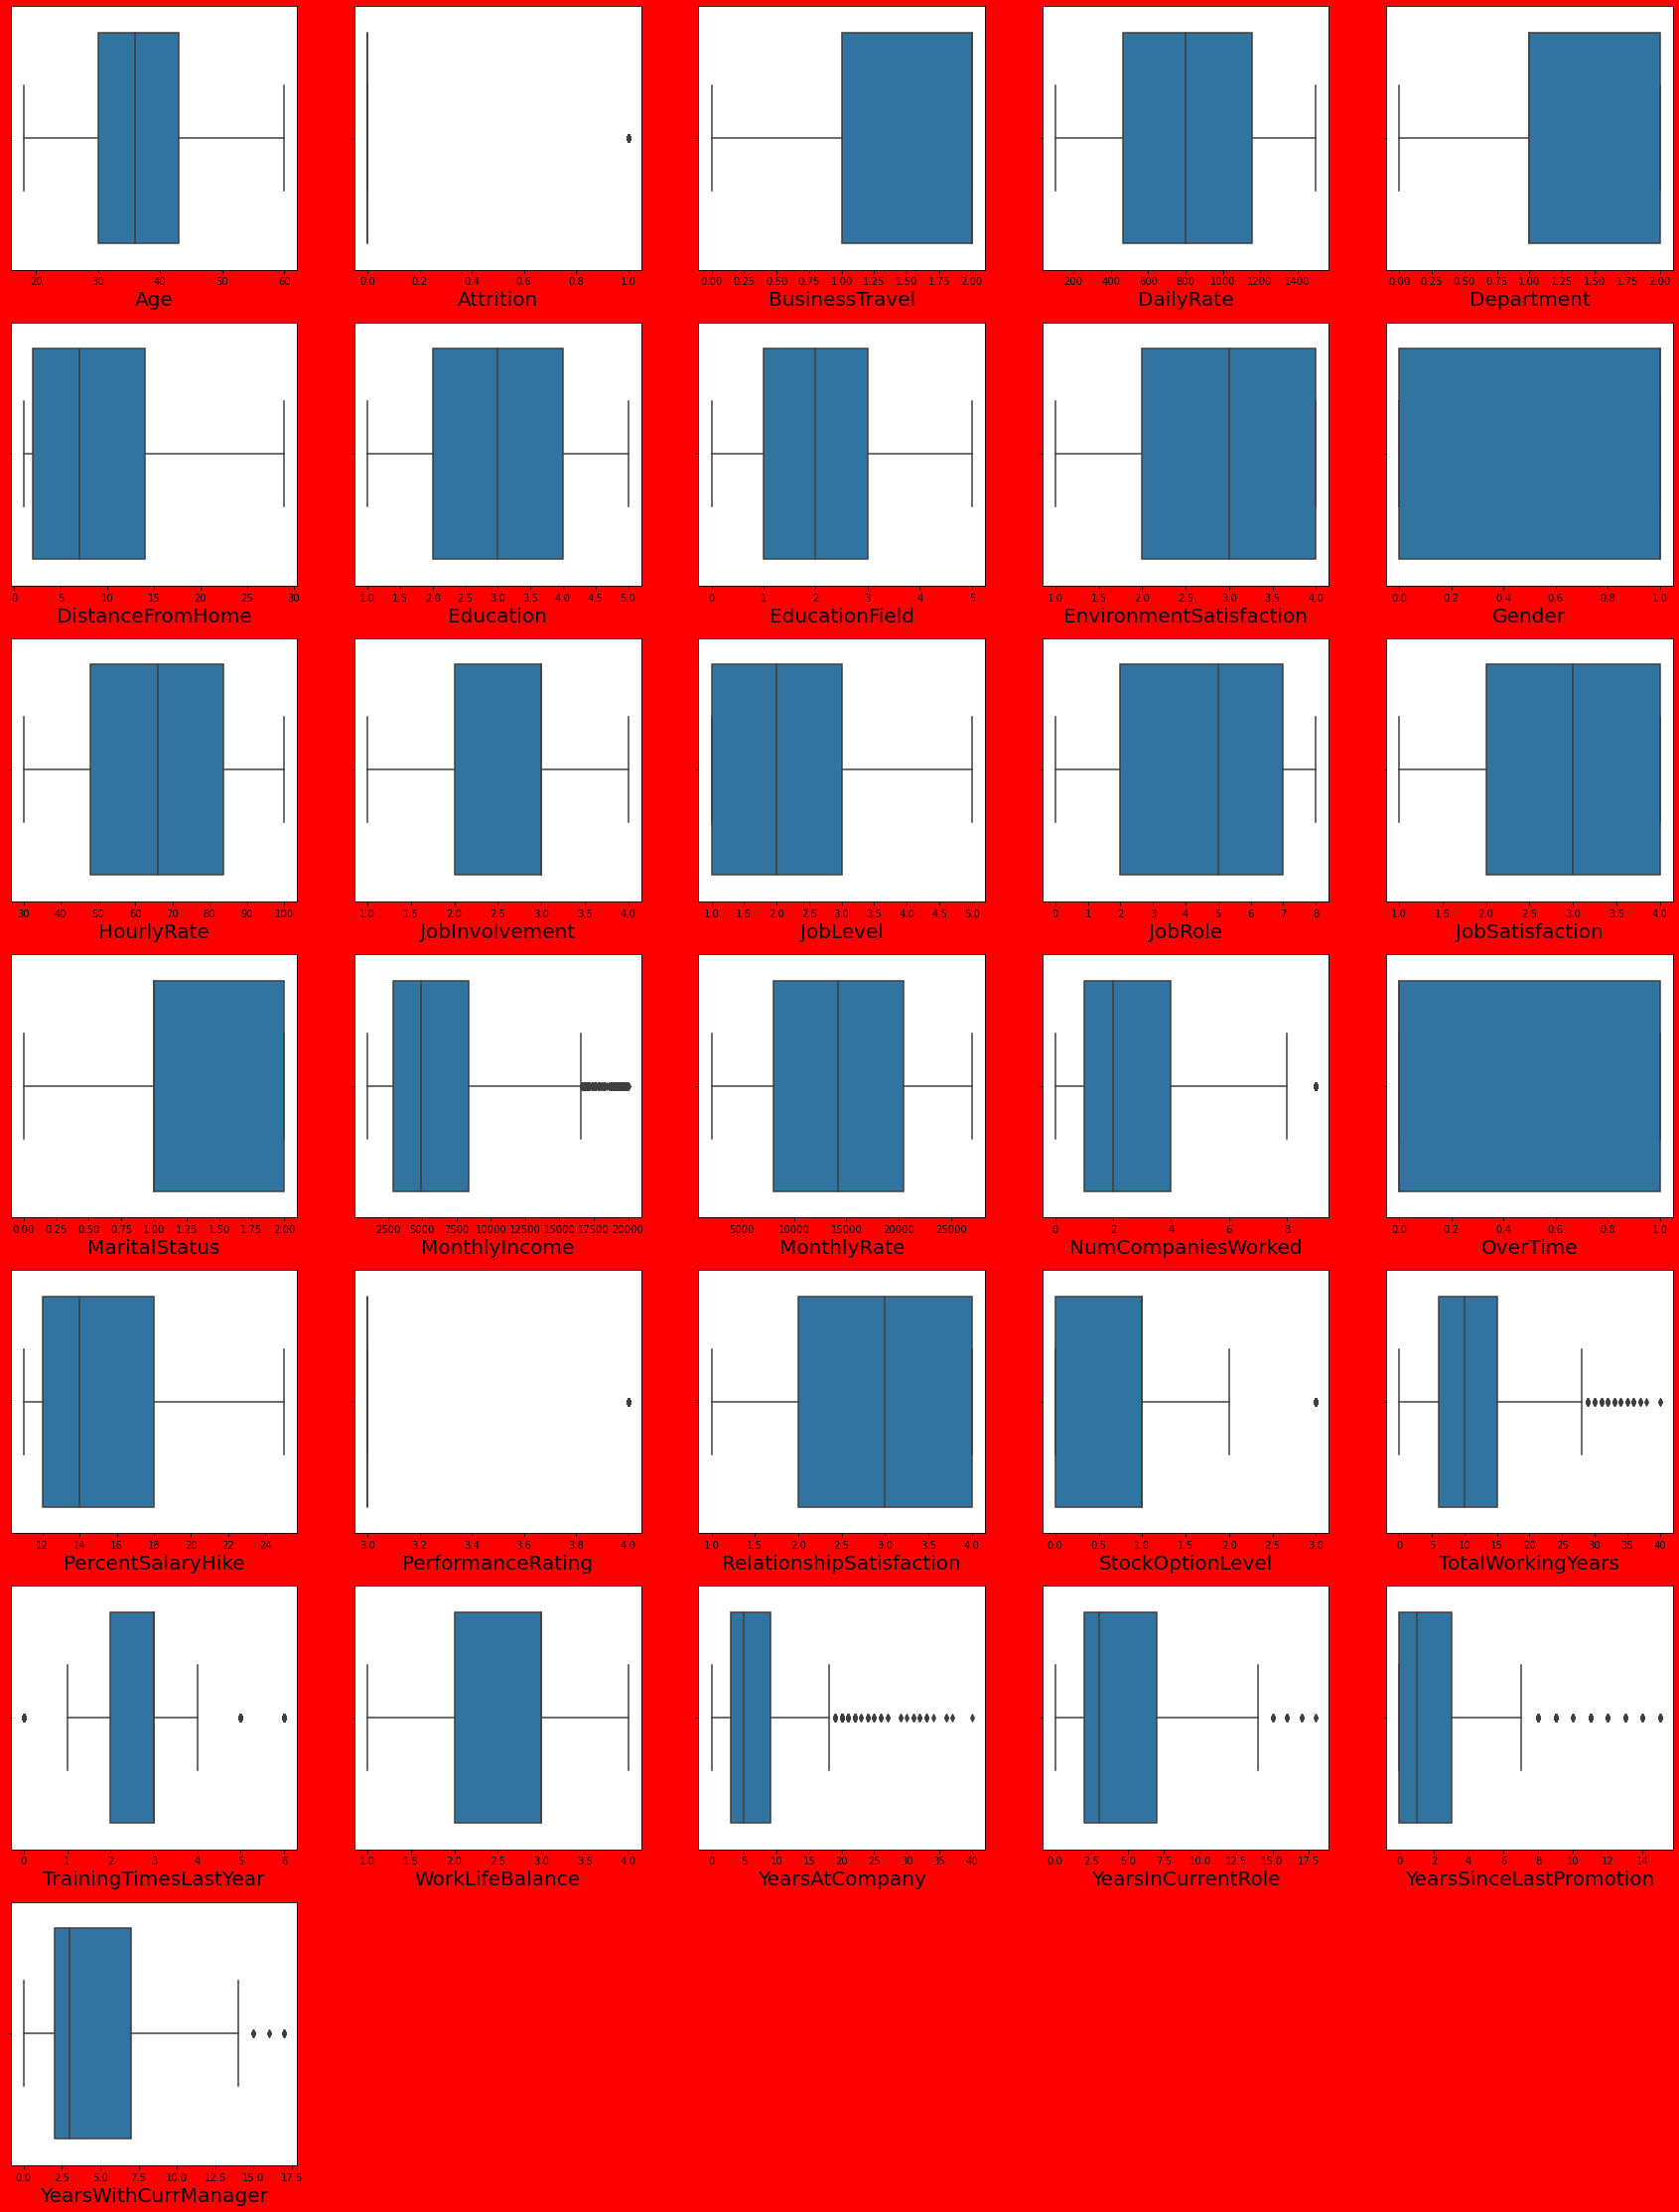

In [60]:
plt.figure(figsize=(30,40) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 35:
        plt.subplot (7,5,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## From the box plot we can see that Some feature has outliers.

## Treating the outliers by Zscore

In [61]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [62]:
# new code for deleting outlier here we take std = 3
z_score = zscore(df)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.5 ).all(axis=1)

df = df[filtering_entry]

df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,...,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.00000,1172.000000,1172.000000,1172.000000,1172.000000
mean,35.542662,0.171502,1.606655,798.330205,1.273891,9.360922,2.875427,2.264505,2.724403,0.603242,...,3.148464,2.691980,0.659556,9.400171,2.801195,2.75256,5.759386,3.738055,1.649317,3.678328
std,8.565061,0.377108,0.661022,403.039031,0.530119,8.139703,1.020629,1.350587,1.091064,0.489434,...,0.355711,1.086288,0.687303,5.775424,1.309063,0.71476,4.102669,3.088031,2.295592,3.137026
min,18.000000,0.000000,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,464.750000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.00000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,0.000000,2.000000,801.500000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000
75%,41.000000,0.000000,2.000000,1147.750000,2.000000,14.250000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,12.000000,3.000000,3.00000,8.000000,7.000000,2.000000,7.000000
max,59.000000,1.000000,2.000000,1498.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,2.000000,30.000000,6.000000,4.00000,22.000000,13.000000,10.000000,13.000000


In [63]:
print('percentage of loss of data by zscore is :',(df1.shape[0]-df.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.25426621160409557


### After treating the outliers we lost around 25% of data.

In [64]:
df.shape

(1172, 31)

### Again Plotting Disrtibution plot to see how data is distributed after treating the outliers.

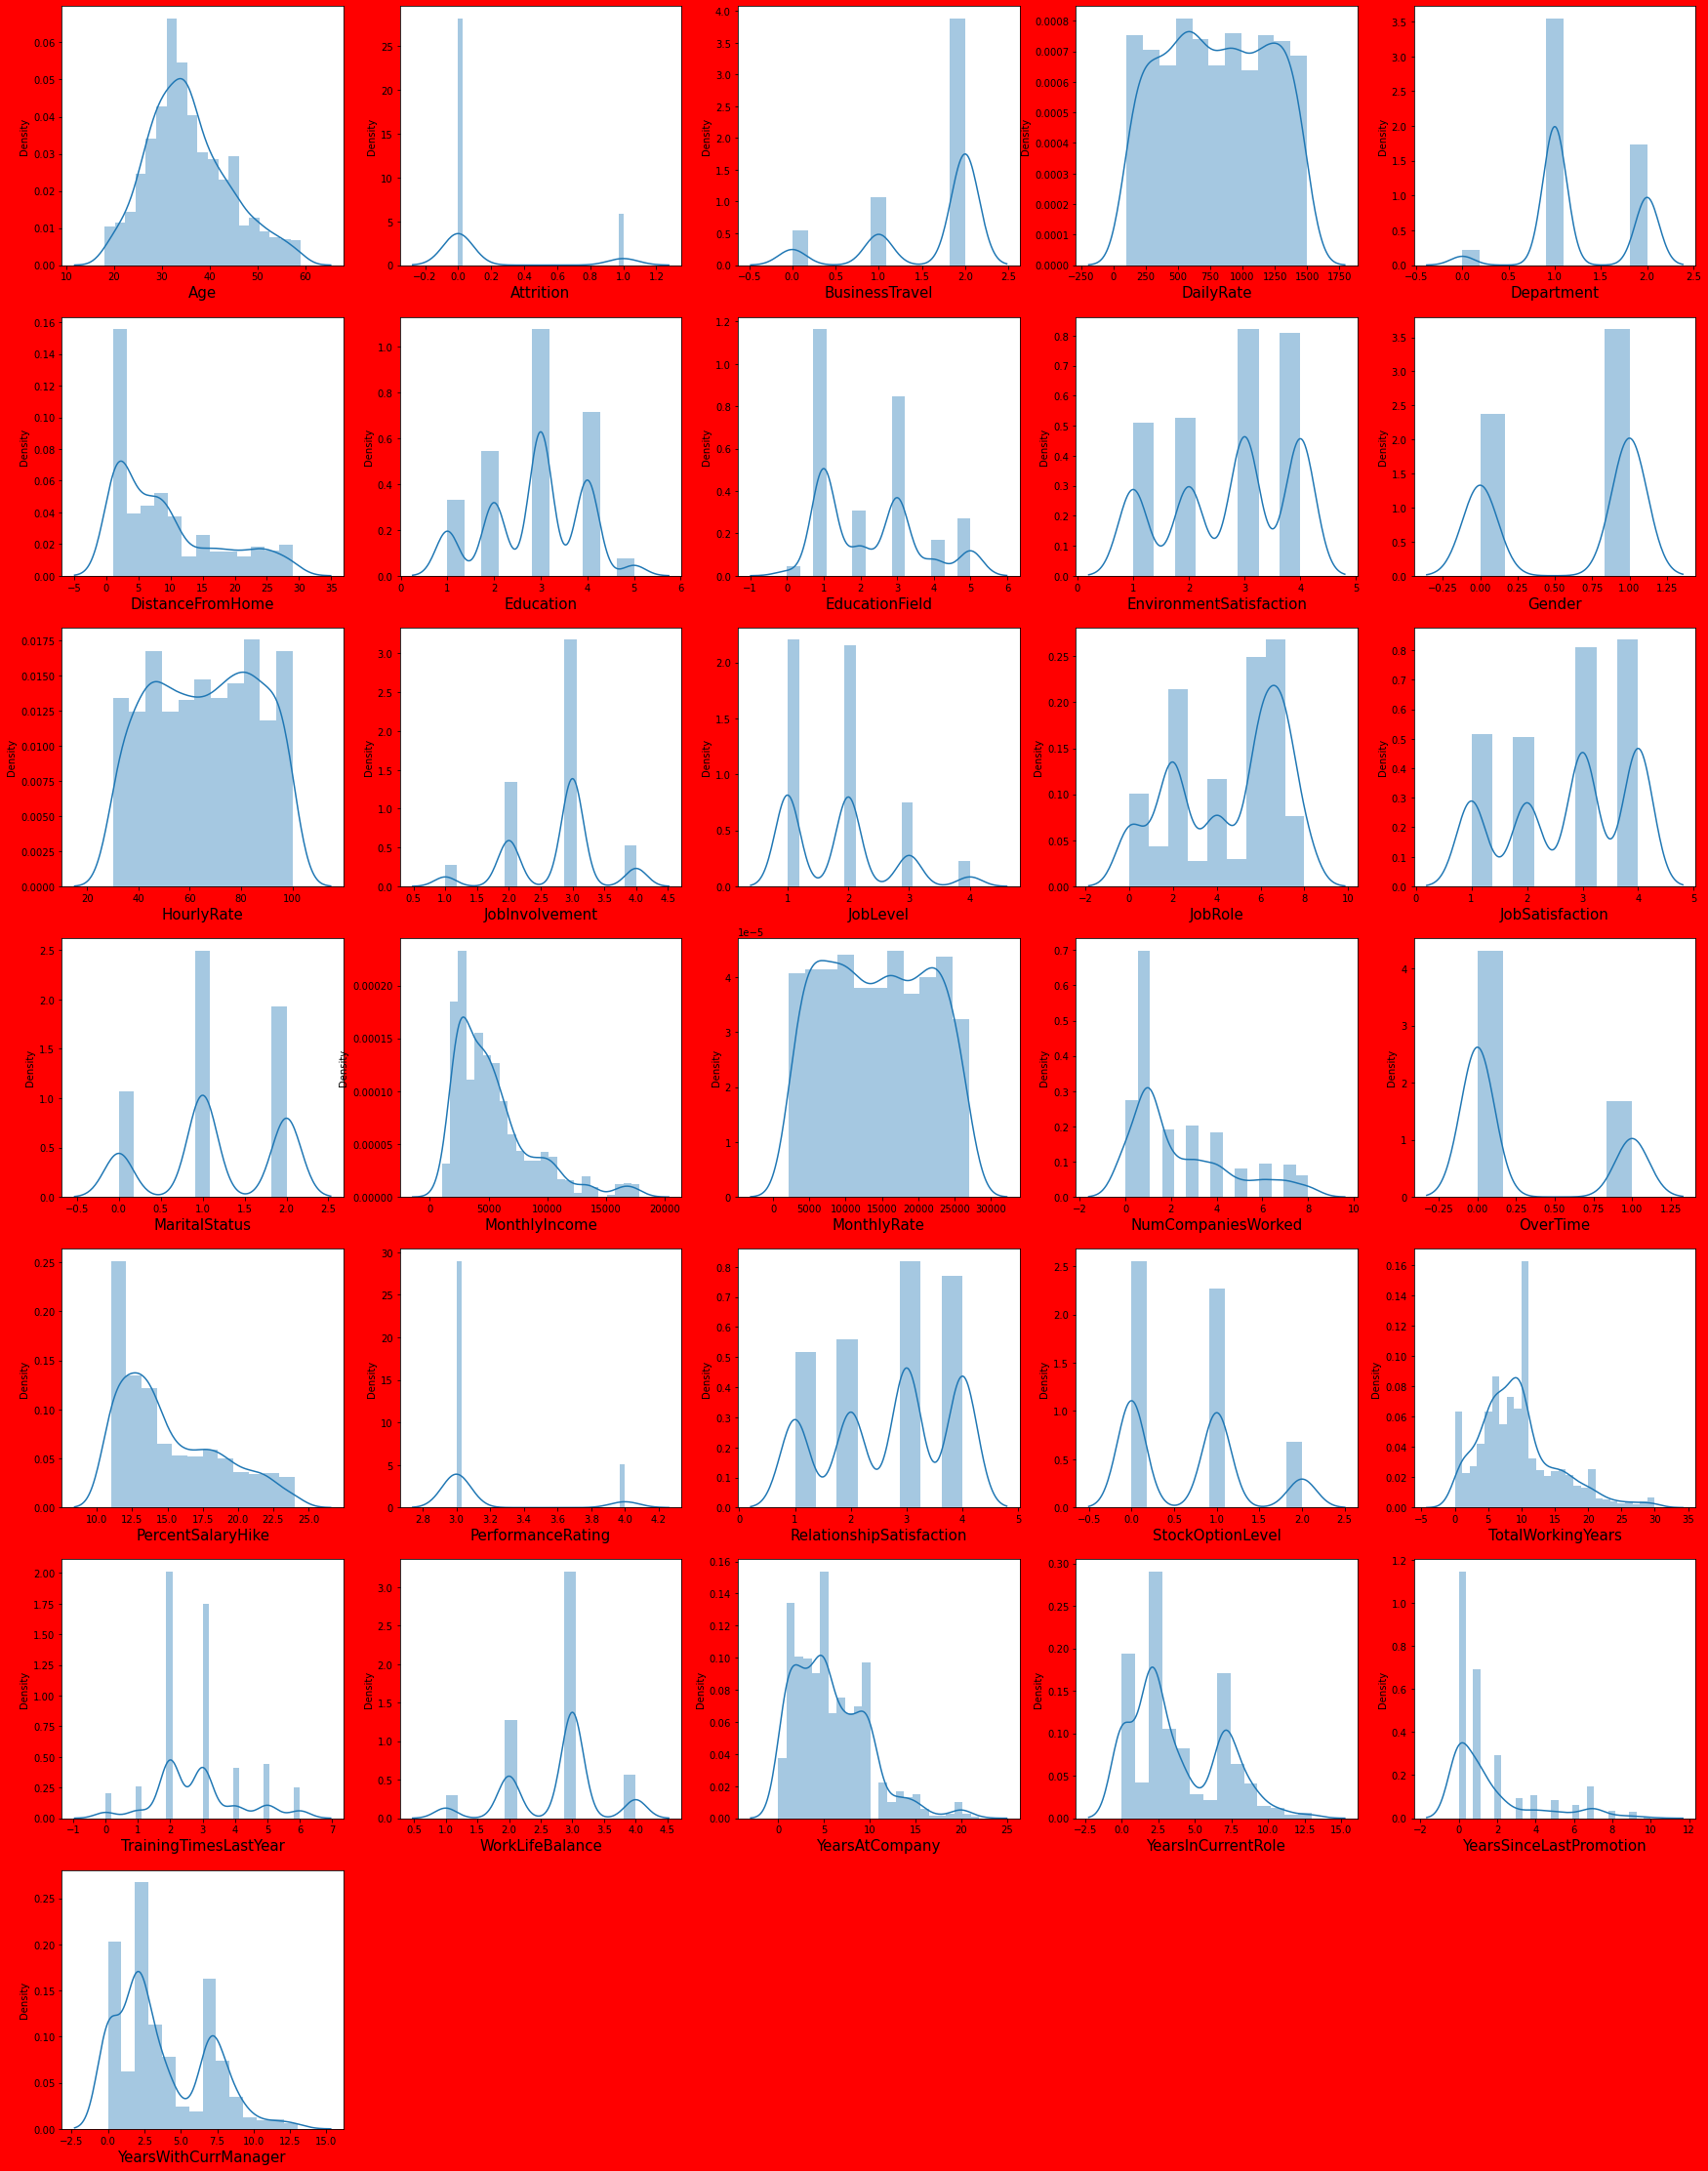

In [65]:
# seeeing dist plot how data is scttered
plt.figure(figsize=(30,40) , facecolor = 'red')
plotnumber = 1

for column in df:
    if plotnumber <= 35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize = 15)
    plotnumber += 1
plt.show()

## Plotting Heatmap to see co-relation 

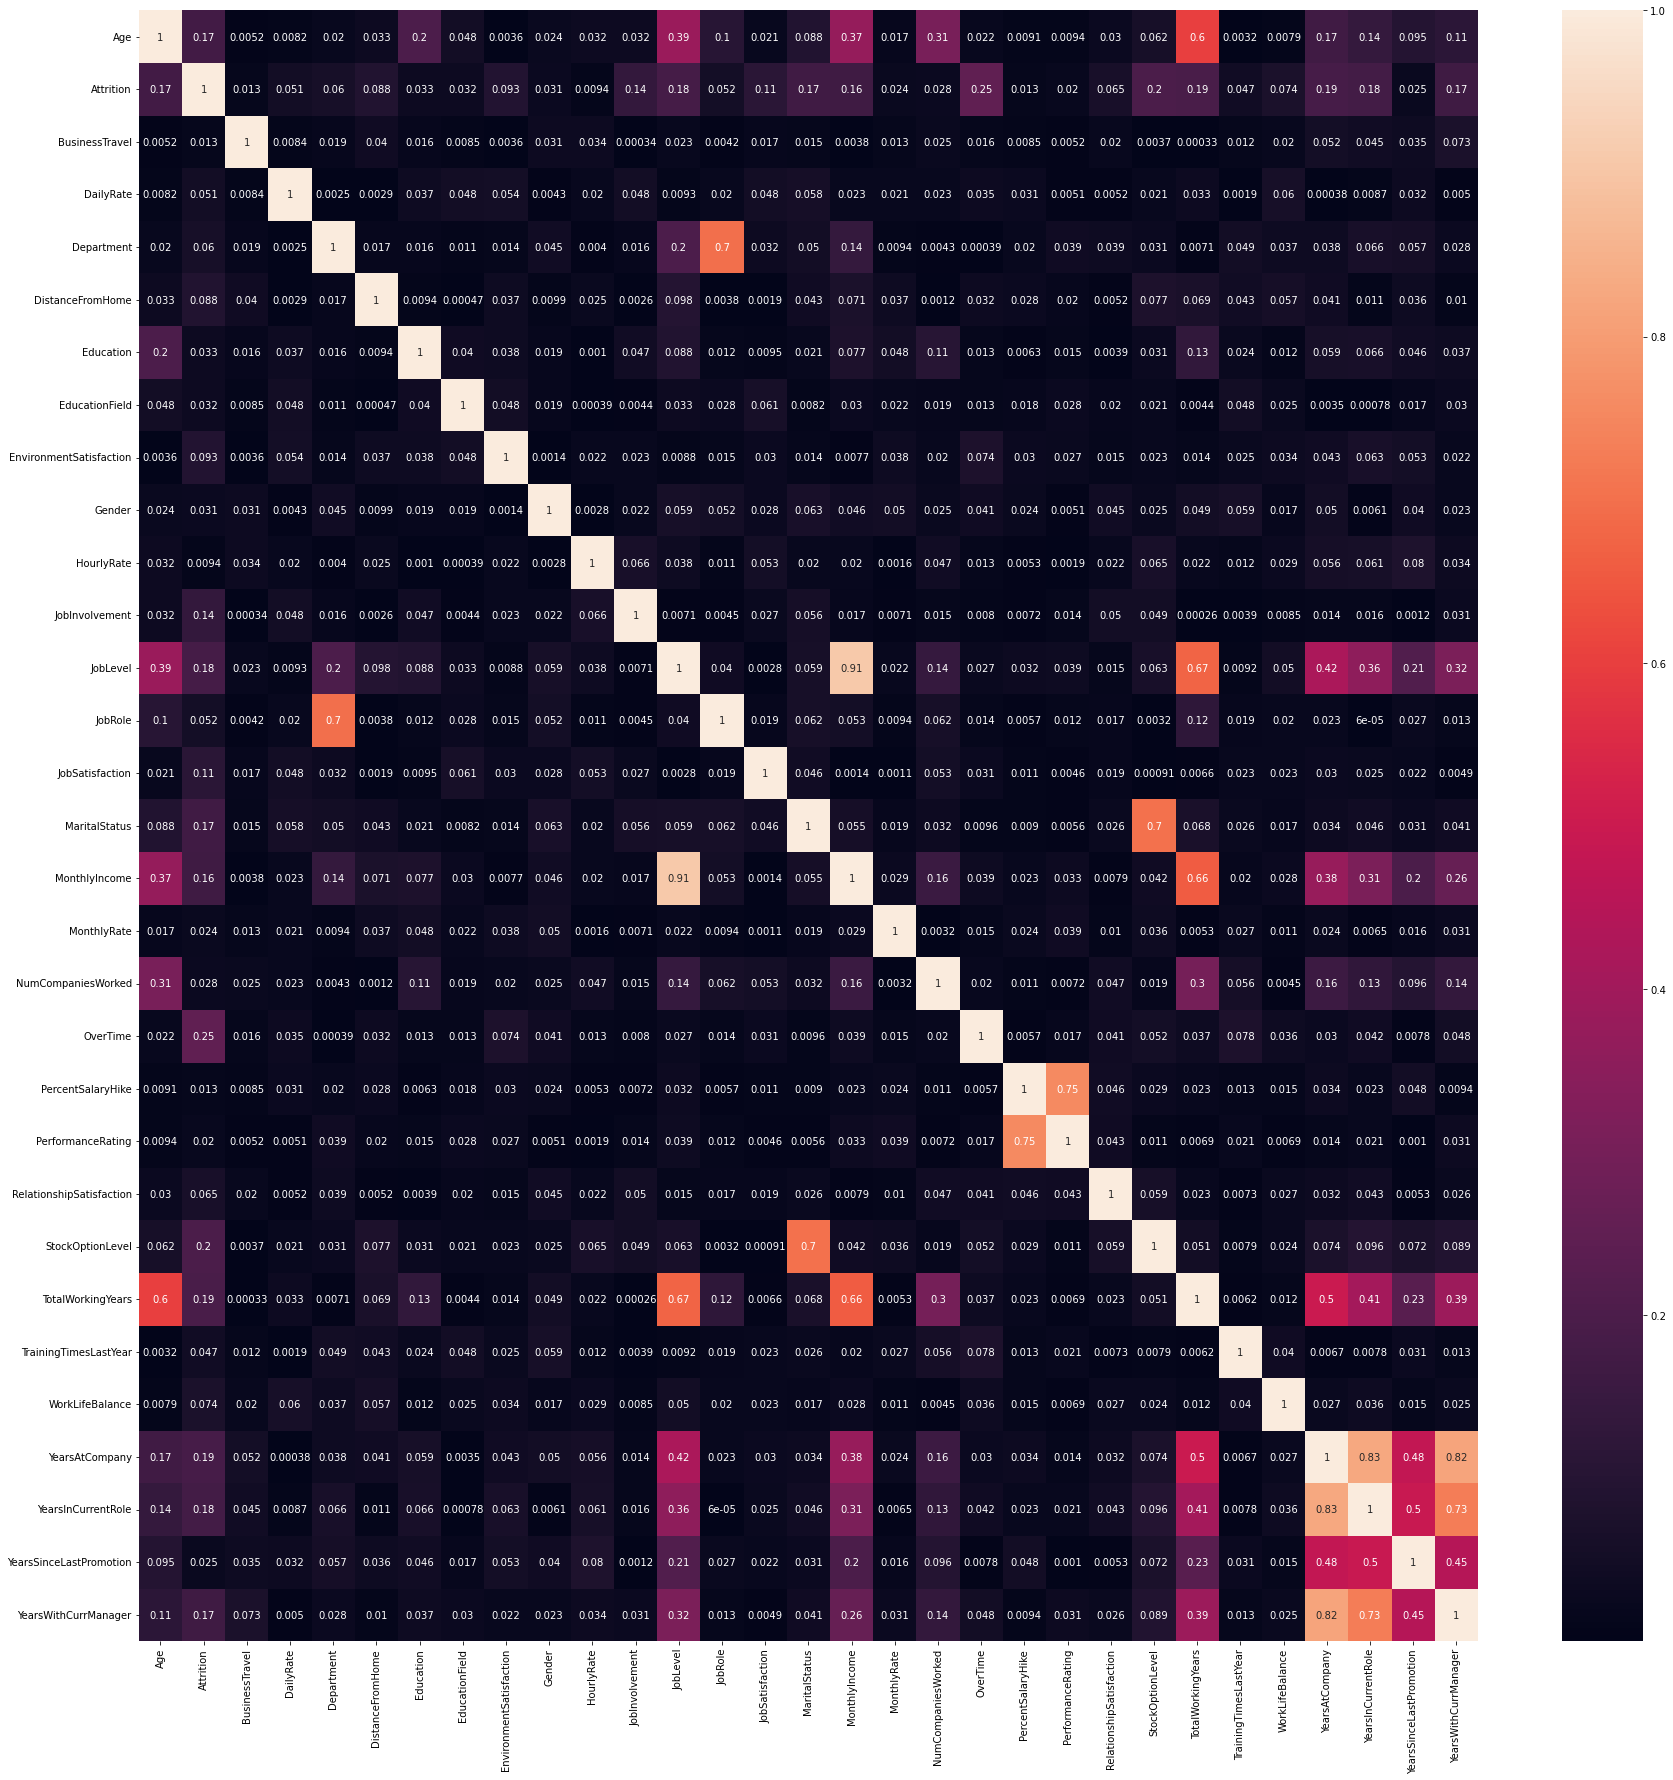

In [66]:
# find relationship between feature vs feature and feature vs label by using new technique that is heatmap

# we can use heatmap to see that problem has multicollinearity problem exist or not

df_corr = df.corr().abs() #this code will give coefficient of one variable vs all other feature (relationship will all)

plt.figure(figsize=(30,30))
sns.heatmap (df_corr , annot = True , annot_kws={'size' : 10}) # df_corr = graph , annot=number inside box , annot_kws=size of number inside box
plt.show()

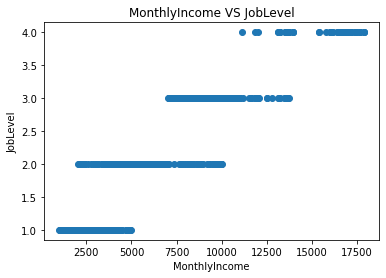

In [68]:
# here im suspecting on ap_hi and ap_lo
# so checking using scatter plot

plt.scatter(df.MonthlyIncome , df.JobLevel)
plt.xlabel('MonthlyIncome')
plt.ylabel('JobLevel')
plt.title('MonthlyIncome VS JobLevel')
plt.show()

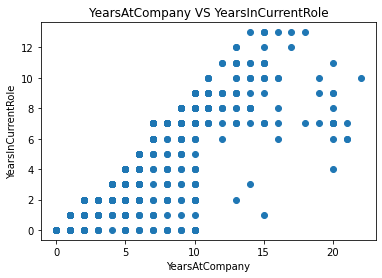

In [69]:
# here im suspecting on ap_hi and ap_lo
# so checking using scatter plot

plt.scatter(df.YearsAtCompany , df.YearsInCurrentRole)
plt.xlabel('YearsAtCompany')
plt.ylabel('YearsInCurrentRole')
plt.title('YearsAtCompany VS YearsInCurrentRole')
plt.show()

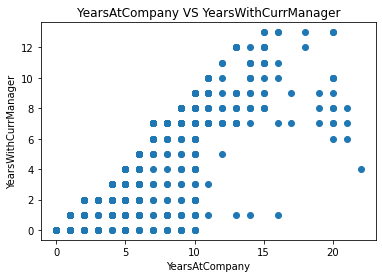

In [70]:
# here im suspecting on ap_hi and ap_lo
# so checking using scatter plot

plt.scatter(df.YearsAtCompany , df.YearsWithCurrManager)
plt.xlabel('YearsAtCompany')
plt.ylabel('YearsWithCurrManager')
plt.title('YearsAtCompany VS YearsWithCurrManager')
plt.show()

## From the heatmap, MonthlyIncome , JobLevel , YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager are highly co-related and we again plot a scratted plot to see any co-relation and we found that they are co-related.

In [72]:
# Removing Highly co-related feature vs feature because if we keep our model will learn same thinf and become overfitted model.
df.drop(['MonthlyIncome' , 'YearsInCurrentRole','YearsWithCurrManager'],axis=1,inplace = True)

### Splitting the data

In [73]:
X = df.drop(['Attrition'],axis = 1)
y = df['Attrition']

### Scaling the dataset

In [74]:
#scale our data using standard sclar

scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

### Checking for the multicollinearity Using VIF

In [75]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.709273,Age
1,1.011509,BusinessTravel
2,1.029535,DailyRate
3,2.247159,Department
4,1.029217,DistanceFromHome
5,1.059565,Education
6,1.022980,EducationField
7,1.032200,EnvironmentSatisfaction
8,1.028230,Gender
9,1.030143,HourlyRate


# LogisticRegression Model

In [57]:
#import necessary library
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Finding best Random State

In [76]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    
    y_pred=lr.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8361774744027304 RandomState 1


MAXINING TESTING SCORE 0.8361774744027304 ON RANDOM STATE OF 1
Testing Accuracy 0.8191126279863481 RandomState 2


Testing Accuracy 0.8293515358361775 RandomState 3


Testing Accuracy 0.8430034129692833 RandomState 4


MAXINING TESTING SCORE 0.8430034129692833 ON RANDOM STATE OF 4
Testing Accuracy 0.8088737201365188 RandomState 5


Testing Accuracy 0.7815699658703071 RandomState 6


Testing Accuracy 0.8703071672354948 RandomState 7


MAXINING TESTING SCORE 0.8703071672354948 ON RANDOM STATE OF 7
Testing Accuracy 0.7952218430034129 RandomState 8


Testing Accuracy 0.8327645051194539 RandomState 9


Testing Accuracy 0.7986348122866894 RandomState 10


Testing Accuracy 0.8361774744027304 RandomState 11


Testing Accuracy 0.8430034129692833 RandomState 12


Testing Accuracy 0.8225255972696246 RandomState 13


Testing Accuracy 0.8395904436860068 RandomState 14


Testing Accuracy 0.8054607508532423 RandomState 15


Testing Accuracy 0.781569

In [77]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.8839590443686007 ON RANDOM STATE OF 18


### Training the model

In [78]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=18)

In [79]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [80]:
# model initilization
clf_lr = LogisticRegression()
clf_lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
# call the function
metric_score (clf_lr,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_lr,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 82.707622%
====Testing Score====
Accuracy score : 88.395904%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.89      0.99      0.94       256
           1       0.71      0.14      0.23        37

    accuracy                           0.88       293
   macro avg       0.80      0.56      0.58       293
weighted avg       0.87      0.88      0.85       293



## Model Scores 
* Training Score = 82.707622%
* Testing Score = 88.395904%

## Hyperparameter For Logistic Regression

In [84]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [85]:
print (grid_result.best_params_)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [86]:
# update our model and train again for new score 

clf_lr=LogisticRegression(C=100,penalty='none',solver='newton-cg')
clf_lr.fit(X_train,y_train)

LogisticRegression(C=100, penalty='none', solver='newton-cg')

In [87]:
# call the function
metric_score (clf_lr,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_lr,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 87.030717%
====Testing Score====
Accuracy score : 87.372014%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.91      0.95      0.93       256
           1       0.50      0.38      0.43        37

    accuracy                           0.87       293
   macro avg       0.71      0.66      0.68       293
weighted avg       0.86      0.87      0.87       293



## Model Scores With Hyperparameter Tuning
* Training Score = 87.030717%
* Testing Score = 87.372014%

## Confusion Matrix Logistic regression

In [151]:
### if you want to check confusion matrix

y_pred=clf_lr.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[249,   6],
       [ 16,  22]], dtype=int64)

# DecisionTreeClassifier Model

In [90]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Finding the best Random State

In [91]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)

    pred=dt.predict(X_train)
    accuracy=accuracy_score(y_train,pred)
    print ('Training Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Training Accuracy 1.0 RandomState 1


Testing Accuracy 0.7952218430034129 RandomState 1


MAXINING TESTING SCORE 0.7952218430034129 ON RANDOM STATE OF 1
Training Accuracy 1.0 RandomState 2


Testing Accuracy 0.7440273037542662 RandomState 2


Training Accuracy 1.0 RandomState 3


Testing Accuracy 0.726962457337884 RandomState 3


Training Accuracy 1.0 RandomState 4


Testing Accuracy 0.7713310580204779 RandomState 4


Training Accuracy 1.0 RandomState 5


Testing Accuracy 0.757679180887372 RandomState 5


Training Accuracy 1.0 RandomState 6


Testing Accuracy 0.7372013651877133 RandomState 6


Training Accuracy 1.0 RandomState 7


Testing Accuracy 0.7815699658703071 RandomState 7


Training Accuracy 1.0 RandomState 8


Testing Accuracy 0.7030716723549488 RandomState 8


Training Accuracy 1.0 RandomState 9


Testing Accuracy 0.7952218430034129 RandomState 9


Training Accuracy 1.0 RandomState 10


Testing Accuracy 0.7679180887372014 RandomState 10


Training Accuracy 1.0 RandomState 11


In [92]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.8156996587030717 ON RANDOM STATE OF 53


### Training  the model

In [93]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=53)

In [94]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [95]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
# call the function
metric_score (clf_dt,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_dt,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 79.180887%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.89      0.85      0.87       245
           1       0.39      0.48      0.43        48

    accuracy                           0.79       293
   macro avg       0.64      0.67      0.65       293
weighted avg       0.81      0.79      0.80       293



## Model Scores 
* Training Score = 100.000000%
* Testing Score = 79.180887%

## Hyperparameter For Decision Tree

In [99]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [100]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [101]:
#pass dataset to train 
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [102]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [103]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 2, min_samples_leaf= 4, min_samples_split= 5)
clf_dt.fit(X_train,y_train)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=5)

In [104]:
# call the function
metric_score (clf_dt,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_dt,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 82.935154%
====Testing Score====
Accuracy score : 84.300341%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.88      0.94      0.91       245
           1       0.53      0.33      0.41        48

    accuracy                           0.84       293
   macro avg       0.71      0.64      0.66       293
weighted avg       0.82      0.84      0.83       293



## Model Scores With Hyperparameter Tuning
* Training Score = 82.935154%
* Testing Score = 84.300341%

## Confusion Matrix Decision tree

In [150]:
### if you want to check confusion matrix

y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[242,  13],
       [ 21,  17]], dtype=int64)

# RandomForestClassifier Model

In [107]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Finding best random State

In [108]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8737201365187713 RandomState 1


MAXINING TESTING SCORE 0.8737201365187713 ON RANDOM STATE OF 1
Testing Accuracy 0.8122866894197952 RandomState 2


Testing Accuracy 0.8225255972696246 RandomState 3


Testing Accuracy 0.8532423208191127 RandomState 4


Testing Accuracy 0.8293515358361775 RandomState 5


Testing Accuracy 0.8088737201365188 RandomState 6


Testing Accuracy 0.8839590443686007 RandomState 7


MAXINING TESTING SCORE 0.8839590443686007 ON RANDOM STATE OF 7
Testing Accuracy 0.8156996587030717 RandomState 8


Testing Accuracy 0.8361774744027304 RandomState 9


Testing Accuracy 0.8156996587030717 RandomState 10


Testing Accuracy 0.8361774744027304 RandomState 11


Testing Accuracy 0.8464163822525598 RandomState 12


Testing Accuracy 0.8361774744027304 RandomState 13


Testing Accuracy 0.8464163822525598 RandomState 14


Testing Accuracy 0.8191126279863481 RandomState 15


Testing Accuracy 0.7781569965870307 RandomState 16


Testing Accuracy 0.8703071672354948

In [109]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.8976109215017065 ON RANDOM STATE OF 53


### Training the model

In [110]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=53)

In [111]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [112]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)


RandomForestClassifier()

In [113]:
# call the function
metric_score (clf_rf,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_rf,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 89.078498%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.90      0.99      0.94       256
           1       0.73      0.22      0.33        37

    accuracy                           0.89       293
   macro avg       0.81      0.60      0.64       293
weighted avg       0.88      0.89      0.86       293



## Model Scores 
* Training Score = 100.000000%
* Testing Score = 89.078498%

## Hyperparameter Tuning for Random Forest

In [114]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [115]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [116]:
#pass dataset to train 
grd.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [117]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 9, 'n_estimators': 3}


In [122]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 15, min_samples_leaf= 5, min_samples_split= 5,n_estimators= 50)
rf.fit(X_train,y_train)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=50)

In [123]:
# call the function
metric_score (rf,X_train,X_test,y_train,y_test,train = True)
metric_score (rf,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 89.078498%
====Testing Score====
Accuracy score : 88.737201%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.89      0.99      0.94       256
           1       0.70      0.19      0.30        37

    accuracy                           0.89       293
   macro avg       0.80      0.59      0.62       293
weighted avg       0.87      0.89      0.86       293



## Model Scores With Hyperparameter Tuning
* Training Score = 89.078498%
* Testing Score = 88.737201%

## Confusion Matrix Random Forest

In [149]:
### if you want to check confusion matrix

y_pred=rf.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[254,   1],
       [ 21,  17]], dtype=int64)

# KNeighborsClassifier Model

In [124]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Finding the best Random State

In [125]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.9112627986348123 RandomState 1


MAXINING TESTING SCORE 0.9112627986348123 ON RANDOM STATE OF 1
Testing Accuracy 0.863481228668942 RandomState 2


Testing Accuracy 0.8873720136518771 RandomState 3


Testing Accuracy 0.8873720136518771 RandomState 4


Testing Accuracy 0.8703071672354948 RandomState 5


Testing Accuracy 0.8430034129692833 RandomState 6


Testing Accuracy 0.9249146757679181 RandomState 7


MAXINING TESTING SCORE 0.9249146757679181 ON RANDOM STATE OF 7
Testing Accuracy 0.8771331058020477 RandomState 8


Testing Accuracy 0.8976109215017065 RandomState 9


Testing Accuracy 0.8600682593856656 RandomState 10


Testing Accuracy 0.8839590443686007 RandomState 11


Testing Accuracy 0.8907849829351536 RandomState 12


Testing Accuracy 0.89419795221843 RandomState 13


Testing Accuracy 0.8737201365187713 RandomState 14


Testing Accuracy 0.8703071672354948 RandomState 15


Testing Accuracy 0.8361774744027304 RandomState 16


Testing Accuracy 0.9112627986348123 Ra

In [126]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.9249146757679181 ON RANDOM STATE OF 7


### Training the model

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=7)

In [139]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,pred)*100:2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,y_pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,y_pred,digits=2))

In [140]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)


KNeighborsClassifier()

In [141]:
# call the function
metric_score (clf_knn,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 83.959044%
====Testing Score====
Accuracy score : 84.641638%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.23      0.08      0.12        38

    accuracy                           0.85       293
   macro avg       0.55      0.52      0.52       293
weighted avg       0.79      0.85      0.81       293



## Model Scores 
* Training Score = 83.959044%
* Testing Score = 84.641638%

## Hyperparameter Tuning for KNNeighbors Classifier

In [142]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [143]:
# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [144]:
#give the data to object
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [145]:
#see the best paramater
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [146]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 13)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [147]:
metric_score(clf_knn,X_train,X_test,y_train,y_test,train=True)

metric_score(clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 81.342435%
====Testing Score====
Accuracy score : 86.348123%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.25      0.03      0.05        38

    accuracy                           0.86       293
   macro avg       0.56      0.51      0.49       293
weighted avg       0.79      0.86      0.81       293



## Model Scores With Hyperparameter Tuning
* Training Score = 81.342435%
* Testing Score = 86.348123%

## Confusion Matric for KNN

In [148]:
### if you want to check confusion matrix

y_pred=clf_knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[252,   3],
       [ 37,   1]], dtype=int64)

# Plot AUC-ROC curve for above 4-Models 

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [156]:
clf_dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
clf_knn=KNeighborsClassifier()
clf_lr=LogisticRegression()

### Training the data

In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=53)

### AUC-ROC Curve is on hyperparameter model

In [158]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 13)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [159]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 15, min_samples_leaf= 5, min_samples_split= 5,n_estimators= 50)
rf.fit(X_train,y_train)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=50)

In [160]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 2, min_samples_leaf= 4, min_samples_split= 5)
clf_dt.fit(X_train,y_train)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=5)

In [161]:
# update our model and train again for new score 

clf_lr=LogisticRegression(C=100,penalty='none',solver='newton-cg')
clf_lr.fit(X_train,y_train)

LogisticRegression(C=100, penalty='none', solver='newton-cg')

In [162]:
clf_dt.score(X_train,y_train)
rf.score(X_train,y_train)
clf_lr.score(X_train,y_train)
clf_knn.score(X_train,y_train)
print('All model are trained')

All model are trained


In [164]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

## AUC-ROC Curve for Training Data

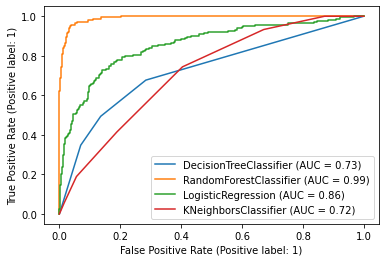

In [165]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train,y_train)

plot_roc_curve(rf,X_train,y_train,ax=disp.ax_)

plot_roc_curve(clf_lr,X_train,y_train,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train,y_train,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Test Data

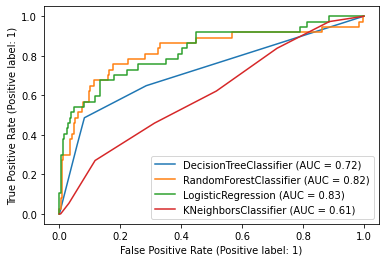

In [166]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()